In [1]:
conda install scikit-learn

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)


Python version
3.8.5 (default, Sep  4 2020, 02:22:02) 
[Clang 10.0.0 ]
Version info.
sys.version_info(major=3, minor=8, micro=5, releaselevel='final', serial=0)


In [2]:
pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
applaunchservices                  0.2.1
appnope                            0.1.0
appscript                          1.1.1
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot



In [4]:
#Setting working directory
import os
os.chdir("/Users/LONGZHENG/Desktop/OMSCS")

In [5]:
data=pd.read_csv('./lcms2017sortclean.csv')

In [6]:
data.columns

Index(['WPC_JD_EXT', 'WPC_JD_SEV', 'start', 'end', 'RT_NE_UNIQUE', 'unid',
       'BEGIN_MP', 'END_MP', 'uniqid', 'HPMS_DIRECTION',
       ...
       'IRI_PER_VALID', 'EXCLUDED_IRI', 'HPMS_AVG_IRI', 'HPMS_IRI_PER_VALID',
       'HPMS_EXCL_IRI', 'EFF_YEAR', 'LENGTH', 'EFF_DATE', 'LATITUDE_END',
       'LONGITUDE_END'],
      dtype='object', length=185)

In [7]:
data.head()

,WPC_JD_EXT,WPC_JD_SEV,start,end,RT_NE_UNIQUE,unid,BEGIN_MP,END_MP,uniqid,HPMS_DIRECTION,...,IRI_PER_VALID,EXCLUDED_IRI,HPMS_AVG_IRI,HPMS_IRI_PER_VALID,HPMS_EXCL_IRI,EFF_YEAR,LENGTH,EFF_DATE,LATITUDE_END,LONGITUDE_END
0,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.161,36.221,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,64.0,1.0,NaN,2017,0.060,12-Jul-17,37.027604,-85.509000
1,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.164,36.205,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,71.0,1.0,NaN,2017,0.041,24-Jul-17,37.027651,-85.509291
2,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.166,36.207,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,60.0,1.0,NaN,2017,0.041,24-Jul-17,37.027621,-85.509261
3,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.205,36.305,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,45.0,1.0,NaN,2017,0.100,24-Jul-17,37.027496,-85.507494
4,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.207,36.307,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,47.0,1.0,NaN,2017,0.100,24-Jul-17,37.027460,-85.507463


In [8]:
data.shape

(22225, 185)

In [9]:
data[data.isnull().any(axis=1)].head()

,WPC_JD_EXT,WPC_JD_SEV,start,end,RT_NE_UNIQUE,unid,BEGIN_MP,END_MP,uniqid,HPMS_DIRECTION,...,IRI_PER_VALID,EXCLUDED_IRI,HPMS_AVG_IRI,HPMS_IRI_PER_VALID,HPMS_EXCL_IRI,EFF_YEAR,LENGTH,EFF_DATE,LATITUDE_END,LONGITUDE_END
0,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.161,36.221,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,64.0,1.0,NaN,2017,0.060,12-Jul-17,37.027604,-85.509000
1,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.164,36.205,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,71.0,1.0,NaN,2017,0.041,24-Jul-17,37.027651,-85.509291
2,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.166,36.207,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,60.0,1.0,NaN,2017,0.041,24-Jul-17,37.027621,-85.509261
3,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.205,36.305,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,45.0,1.0,NaN,2017,0.100,24-Jul-17,37.027496,-85.507494
4,0,0,36.159,43.02,001-LN-9008 -000,001-LN-9008 -000Inc,36.207,36.307,001-LN-9008 -000Inc36.15943.02,E,...,1.0,NaN,47.0,1.0,NaN,2017,0.100,24-Jul-17,37.027460,-85.507463


In [10]:
#cut table with 4 main factors without ,'NON_WHEEL_LONG_LOWsqr'

sample_data=data.loc[:,['WPC_JD_EXT','FAT_CRK_TYPEA_MED','FAT_CRK_TYPEA_HIGH','NON_WHEEL_LONG_LOW']]

In [11]:
clean_data=sample_data.copy()
clean_data['label_wpc_jd_ext']=(clean_data['WPC_JD_EXT']>0)*1
clean_data['label_wpc_jd_ext'].head()

0    0
1    0
2    0
3    0
4    0
Name: label_wpc_jd_ext, dtype: int64

In [12]:
clean_data.shape

(22225, 5)

In [13]:
y=clean_data[['label_wpc_jd_ext']].copy()
y.head()

,label_wpc_jd_ext
0,0
1,0
2,0
3,0
4,0


In [14]:
training_features=['FAT_CRK_TYPEA_MED','FAT_CRK_TYPEA_HIGH','NON_WHEEL_LONG_LOW']

In [15]:
x=clean_data[training_features].copy()
x.columns

Index(['FAT_CRK_TYPEA_MED', 'FAT_CRK_TYPEA_HIGH', 'NON_WHEEL_LONG_LOW'], dtype='object')

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=324)

# Decision tree

In [17]:
LCMS_classifier=DecisionTreeClassifier(max_leaf_nodes=10,random_state=0,criterion='gini')
LCMS_classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [18]:
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#                      max_features=None, max_leaf_nodes=10,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_sample_split=2,
#                      min_weight_fraction_leaf=0.0, presort=False,
#                      random_state=0, splitter='best')

In [19]:
y_predicted=LCMS_classifier.predict(x_test)

In [20]:
accuracy_score(y_test,y_predicted)*100

78.65030674846626

In [21]:
print(classification_report(y_test,y_predicted))
print(confusion_matrix(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.60      0.43      0.50      1837
           1       0.83      0.90      0.86      5498

    accuracy                           0.79      7335
   macro avg       0.71      0.67      0.68      7335
weighted avg       0.77      0.79      0.77      7335

[[ 794 1043]
 [ 523 4975]]


In [22]:
#pip install opencv-contrib-python

In [23]:
#pip install graphviz

[Text(558.0, 996.6, 'X[0] <= 0.705\ngini = 0.367\nsamples = 14890\nvalue = [3606, 11284]'),
 Text(279.0, 815.4000000000001, 'X[2] <= 60.36\ngini = 0.5\nsamples = 5327\nvalue = [2651, 2676]'),
 Text(139.5, 634.2, 'X[2] <= 7.36\ngini = 0.481\nsamples = 2524\nvalue = [1509, 1015]'),
 Text(69.75, 453.0, 'gini = 0.436\nsamples = 712\nvalue = [483, 229]'),
 Text(209.25, 453.0, 'gini = 0.491\nsamples = 1812\nvalue = [1026, 786]'),
 Text(418.5, 634.2, 'X[0] <= 0.335\ngini = 0.483\nsamples = 2803\nvalue = [1142, 1661]'),
 Text(348.75, 453.0, 'gini = 0.494\nsamples = 2117\nvalue = [940, 1177]'),
 Text(488.25, 453.0, 'gini = 0.416\nsamples = 686\nvalue = [202, 484]'),
 Text(837.0, 815.4000000000001, 'X[2] <= 103.495\ngini = 0.18\nsamples = 9563\nvalue = [955, 8608]'),
 Text(697.5, 634.2, 'X[0] <= 3.045\ngini = 0.378\nsamples = 1970\nvalue = [499, 1471]'),
 Text(627.75, 453.0, 'gini = 0.448\nsamples = 870\nvalue = [295, 575]'),
 Text(767.25, 453.0, 'X[1] <= 9.38\ngini = 0.302\nsamples = 1100\nvalu

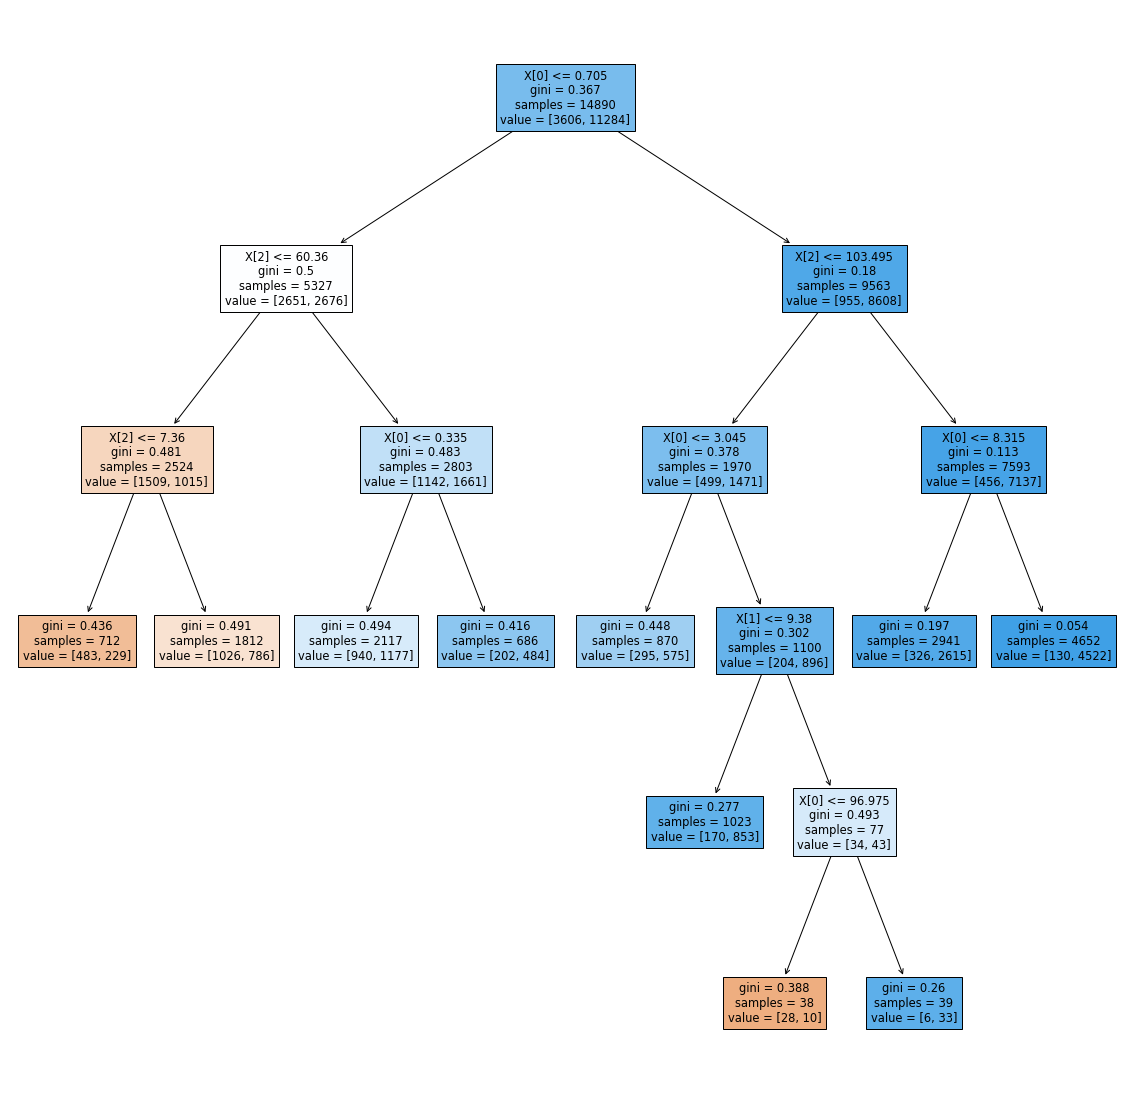

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (20, 20))
tree.plot_tree(LCMS_classifier,filled=True)

# Neural Network

In [27]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=500)
mlpc.fit(x_train,y_train)
pred_mlpc=mlpc.predict(x_test)

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
print(classification_report(y_test,pred_mlpc))
print(confusion_matrix(y_test,pred_mlpc))

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1837
           1       0.86      0.84      0.85      5498

    accuracy                           0.78      7335
   macro avg       0.71      0.72      0.71      7335
weighted avg       0.78      0.78      0.78      7335

[[1091  746]
 [ 890 4608]]


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.78723976 0.78952317]
0.7883814640698456


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't co

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (81) reached and the optimization hasn't co

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (93) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (94) reached and the optimization hasn't co

[0.7793821356615178, 0.7840832773673607, 0.7772330423102753, 0.7859637340496978, 0.7833445265278711, 0.7897246474143721, 0.7860980523841504, 0.7874412357286769, 0.7828072531900605, 0.7820013431833446, 0.7846877098723977, 0.7863666890530558, 0.789523169912693, 0.792813969106783, 0.7883143049026192, 0.7633982538616522, 0.7797850906648758, 0.7875755540631296, 0.7828744123572868, 0.7911349899261249, 0.787038280725319, 0.781464069845534, 0.7873069173942243, 0.7852249832102083, 0.7900604432505037, 0.7879785090664876, 0.7844190732034924, 0.7914036265950302, 0.7827400940228342, 0.7863666890530558, 0.7884486232370719, 0.7860308932169241, 0.7910678307588985, 0.7912021490933513, 0.7899261249160511, 0.7901947615849564, 0.7918065815983881, 0.7881128274009402, 0.7881799865681665, 0.7910006715916722, 0.7917394224311618, 0.7910678307588985, 0.7719946272666218, 0.7840161182001344, 0.7875083948959033, 0.7891202149093351, 0.7893888515782405, 0.7883814640698456, 0.7907320349227669, 0.7886501007387509, 0.7

Text(0, 0.5, 'Cross-Validated Accuracy')

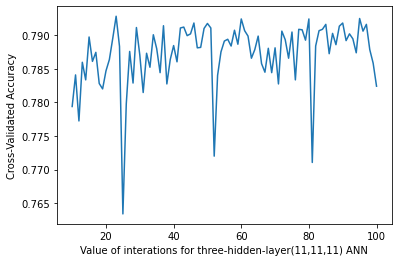

In [32]:
#ann cross_val_score vs a range
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

scores=cross_val_score(mlpc,x_train,y_train,cv=2,scoring='accuracy')
print (scores)
print(scores.mean())
a_range=range(10,101)
a_scores=[]
for a in a_range:
    mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11),max_iter=a)
    scores=cross_val_score(mlpc,x_train,y_train,cv=2,scoring='accuracy')
    a_scores.append(scores.mean())
print(a_scores)
plt.plot(a_range,a_scores)
plt.xlabel('Value of interations for three-hidden-layer(11,11,11) ANN')
plt.ylabel('Cross-Validated Accuracy')

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.78428475 0.78764271]
0.7859637340496978


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't co

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (18) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (26) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (34) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (42) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (51) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (59) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (69) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (79) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (79) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using 

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

[0.7787105439892545, 0.7673606447280054, 0.7858965748824714, 0.7766957689724647, 0.7834116856950974, 0.7767629281396911, 0.7782404298186703, 0.7482874412357287, 0.780456682337139, 0.787441235728677, 0.7817327065144393, 0.7815312290127603, 0.7785762256548019, 0.7824042981867025, 0.7871725990597717, 0.7828072531900605, 0.7852921423774345, 0.7905305574210879, 0.7919408999328408, 0.787441235728677, 0.7817998656816656, 0.784150436534587, 0.7821356615177972, 0.7831430490261921, 0.780658159838818, 0.780859637340497, 0.7865681665547347, 0.780658159838818, 0.7875755540631296, 0.7740094022834116, 0.7853593015446608, 0.7799194089993284, 0.7882471457353929, 0.79012760241773, 0.7904633982538616, 0.7920752182672934, 0.7893888515782405, 0.7883143049026192, 0.7817998656816656, 0.7822028206850236, 0.7890530557421088, 0.7844862323707187, 0.789724647414372, 0.793015446608462, 0.7869039623908664, 0.7899261249160511, 0.7886501007387507, 0.790329079919409, 0.7914036265950302, 0.7869039623908664, 0.792478173

Text(0, 0.5, 'Cross-Validated Accuracy')

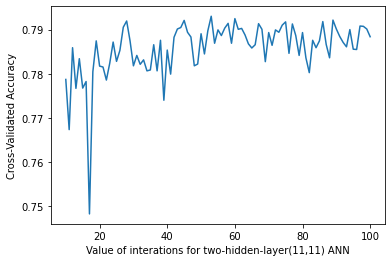

In [33]:
#ann cross_val_score vs a range
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

scores=cross_val_score(mlpc,x_train,y_train,cv=2,scoring='accuracy')
print (scores)
print(scores.mean())
a_range=range(10,101)
a_scores=[]
for a in a_range:
    mlpc=MLPClassifier(hidden_layer_sizes=(11,11),max_iter=a)
    scores=cross_val_score(mlpc,x_train,y_train,cv=2,scoring='accuracy')
    a_scores.append(scores.mean())
print(a_scores)
plt.plot(a_range,a_scores)
plt.xlabel('Value of interations for two-hidden-layer(11,11) ANN')
plt.ylabel('Cross-Validated Accuracy')

# SVM

In [ ]:
clf=svm.SVC(kernel ='poly',C=1, probability=True)
clf.fit(x_train,y_train)
pred_clf=clf.predict(x_test)

In [ ]:
print(classification_report(y_test,pred_clf))
print(confusion_matrix(y_test,pred_clf))

In [33]:
costs = np.power(10.0, range(-2,2))
print(costs)
kernels = ['poly', 'rbf']
print(kernels)
auc_rad_tst = np.zeros((len(costs),len(kernels)))
print(auc_rad_tst)
auc_rad_trn = np.zeros((len(costs),len(kernels)))
# Comment out second layer for run time.



[ 0.01  0.1   1.   10.  ]
['poly', 'rbf']
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


0 0


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0 1


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1 0


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


1 1


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


2 0


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


2 1


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


3 0


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


3 1


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


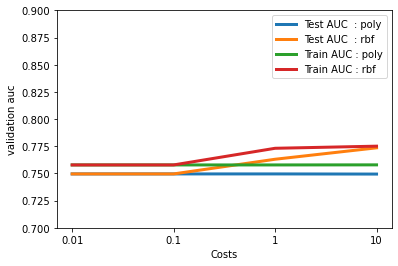

In [41]:
for i in range(len(costs)):
    for k in range(len(kernels)):
        print (i, k)
        svc1 = svm.SVC(kernel = kernels[k], C=costs[i], probability=True)
        svc1.fit(x_train,y_train)
        auc_rad_tst[i,k] = accuracy_score(y_test, svc1.predict(x_test))
        auc_rad_trn[i,k] = accuracy_score(y_train, svc1.predict(x_train))

for k in range(len(kernels)):
    pyplot.plot(auc_rad_tst[:,k], linewidth=3, label="Test AUC  : "+kernels[k])
for k in range(len(kernels)):
    pyplot.plot(auc_rad_trn[:,k], linewidth=3, label="Train AUC : "+kernels[k])
plt.legend(loc='upper right')
pyplot.ylim(0.70, 0.9)
np.set_printoptions(precision=3)
plt.xticks(range(len(costs)),['0.01','0.1', '1','10'])
pyplot.xlabel("Costs")
pyplot.ylabel("validation auc")
pyplot.show()

# KNN

In [28]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

<ipython-input-28-13b6d781c55e>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(x_train,y_train)


In [29]:
print(classification_report(y_test,pred_knn))
print(confusion_matrix(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.54      0.43      0.48      1837
           1       0.82      0.88      0.85      5498

    accuracy                           0.77      7335
   macro avg       0.68      0.66      0.67      7335
weighted avg       0.75      0.77      0.76      7335

[[ 796 1041]
 [ 673 4825]]


In [33]:
#knn cross_val_score vs k range
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
print (scores)
print(scores.mean())

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

[0.7743452  0.77770316 0.77568838 0.75889859 0.78038952 0.78643385
 0.76427132 0.7904634  0.76695769 0.77501679]
0.7750167897918067


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [38]:
k_range=range(1,31)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_select

[0.7346541302887845, 0.7039623908663531, 0.7586971121558093, 0.7445936870382808, 0.7694425789120214, 0.7579583613163197, 0.7719274680993956, 0.7663532572196105, 0.7714573539288112, 0.7670920080591, 0.7750167897918067, 0.7713230355943587, 0.7765614506380121, 0.7726662189388852, 0.7781061114842176, 0.7760241773002016, 0.7802552048354601, 0.7783747481531229, 0.7792478173270652, 0.7791134989926125, 0.7811954331766285, 0.7792478173270652, 0.7826057756883815, 0.7815983881799866, 0.7830087306917395, 0.7824714573539289, 0.784351914036266, 0.7825386165211551, 0.784754869039624, 0.7832102081934185]


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Text(0, 0.5, 'Cross-Validated Accuracy')

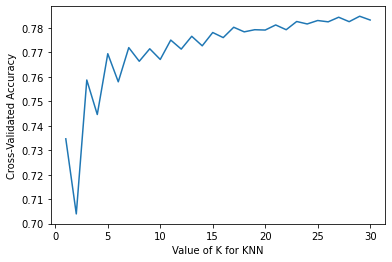

In [39]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Boosting


In [30]:
adb=AdaBoostClassifier(n_estimators=100, learning_rate=1)
adb.fit(x_train,y_train)
pred_adb=adb.predict(x_test)

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
print(classification_report(y_test,pred_adb))
print(confusion_matrix(y_test,pred_adb))

              precision    recall  f1-score   support

           0       0.57      0.51      0.54      1837
           1       0.84      0.87      0.86      5498

    accuracy                           0.78      7335
   macro avg       0.71      0.69      0.70      7335
weighted avg       0.77      0.78      0.78      7335

[[ 929  908]
 [ 698 4800]]


In [42]:
confusion_adb=confusion_matrix(y_test,pred_adb)
TP=confusion_adb[1,1]
TN=confusion_adb[0,0]
FP=confusion_adb[0,1]
FN=confusion_adb[1,0]

In [43]:
scores_adb=cross_val_score(adb,x_train,y_train,cv=10,scoring='accuracy')
print (scores_adb)
print(scores_adb.mean())

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.7904634  0.80120887 0.78374748 0.76762928 0.78643385 0.78912021
 0.79382136 0.79986568 0.78509066 0.78173271]
0.7879113498992613


/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/LONGZHENG/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

[0.7879113498992613, 0.7884486232370719, 0.788247145735393, 0.7885157824042983, 0.7881799865681666, 0.7884486232370719, 0.7879785090664875, 0.7881799865681666, 0.7885157824042983, 0.7878441907320349, 0.7885829415715244, 0.7879785090664877, 0.7887172599059772, 0.7888515782404297, 0.7891873740765614, 0.7903290799194089, 0.7893888515782403, 0.7895231699126931, 0.7884486232370719, 0.7877770315648085, 0.7879113498992613, 0.787642713230356, 0.7875755540631296, 0.787642713230356, 0.7881128274009402, 0.7887844190732034, 0.7881128274009402, 0.7881799865681666, 0.7880456682337138, 0.7881128274009402, 0.7881799865681666, 0.7881128274009402, 0.7879113498992613, 0.7879785090664876, 0.7882471457353929, 0.7882471457353929, 0.7882471457353929, 0.7879113498992613, 0.7879113498992611, 0.7884486232370719, 0.7886501007387509]


Text(0, 0.5, 'Cross-Validated Accuracy')

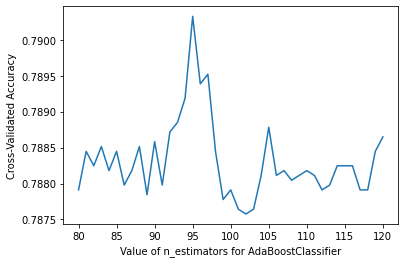

In [46]:
n_range=range(80,121)
N_scores=[]
for n in n_range:
    adb=AdaBoostClassifier(n_estimators=n, learning_rate=1)
    scores_adb=cross_val_score(adb,x_train,y_train,cv=10,scoring='accuracy')
    N_scores.append(scores_adb.mean())
print(N_scores)
plt.plot(n_range,N_scores)
plt.xlabel('Value of n_estimators for AdaBoostClassifier')
plt.ylabel('Cross-Validated Accuracy')